**Project Name**  - Global Delivery Performance Analysis – FedEx Logistics

**Project Type** -
EDA (Exploratory Data Analysis)

**Contribution** -
Individual

**Team Member 1** -
Sufiya Sulthana

**Project** **Summary**

This EDA project focuses on analyzing the delivery performance of FedEx Logistics, aiming to uncover insights into global shipment operations. The dataset contains information on purchase orders, delivery schedules, vendor performance, and shipment details across various countries and shipment modes.

We start by cleaning the dataset, handling missing values, converting date fields, and calculating delivery delay metrics. A key aspect of the analysis includes categorizing shipments as ‘On Time’ or ‘Delayed’, followed by visual storytelling using univariate, bivariate, and multivariate analyses.

Insights include:

**Which vendors consistently deliver on time

Impact of shipment mode on delivery status

Regional shipment performance

Correlation between item weight and insurance cost

Identifying delivery delay patterns to improve forecasting **

These insights help stakeholders identify bottlenecks, improve vendor selection, and optimize shipment modes for better performance.



**GitHub Link** - https://github.com/SulthanaSufiya

**Problem Statement**

To analyze the shipment and delivery performance data to identify factors leading to delays, and provide data-driven recommendations for improving on-time delivery across regions, vendors, and shipment types.

**Define Business Objective**

The objective is to identify delivery inefficiencies and improve overall shipment reliability by:

Monitoring vendor performance

Optimizing shipment mode selection

Predicting potential delivery delays

Supporting cost-effective and timely delivery decisions



**Solution to Business Objective**

Create vendor scorecards to assess consistent delivery

Recommend air shipments for urgent delivery items

Set alerts for high-risk delays based on prior data

Focus on top-performing countries/vendors for expansion

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving SCMS_Delivery_History_Dataset.csv to SCMS_Delivery_History_Dataset (1).csv


**Import Libraries & Load Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Optional visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [ ]:
# Load the CSV (file name must match exactly after upload)
df = pd.read_csv("SCMS_Delivery_History_Dataset.csv")

# View top rows
df.head()


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


**Understand the Dataset**

Explore structure, summary, data types



In [ ]:
# Rows & columns
print("Dataset Shape:", df.shape)

# Data types and non-null counts
df.info()

# Quick statistics
df.describe(include='all')


Dataset Shape: (10324, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       103

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,10324.000000,10324,10324,10324,10324,10324,10324,10324,10324,9964,...,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324,10324,10324,10324,10037.000000
unique,NaN,142,1237,6233,7030,43,4,2,8,4,...,NaN,NaN,NaN,NaN,NaN,88,2,4688,6733,NaN
top,NaN,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,...,NaN,NaN,NaN,NaN,NaN,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost,NaN
freq,NaN,768,2681,67,54,1406,10265,5404,5404,6113,...,NaN,NaN,NaN,NaN,NaN,3172,7030,1507,1442,NaN
mean,51098.968229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,NaN,NaN,NaN,NaN,240.117626
std,31944.332496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,NaN,NaN,NaN,NaN,500.190568
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,12795.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,408.000000,4.314593e+03,4.120000,0.080000,NaN,NaN,NaN,NaN,6.510000
50%,57540.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,NaN,NaN,NaN,NaN,47.040000
75%,83648.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,NaN,NaN,NaN,NaN,252.400000


**Handle Missing Values**

Find and handle null values

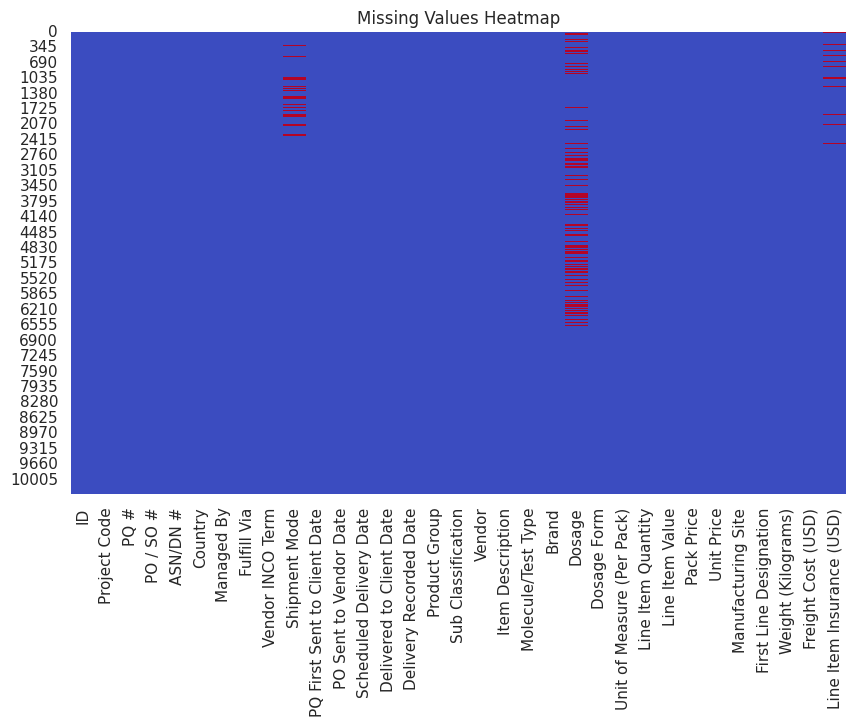

In [ ]:
# Missing value summary
df.isnull().sum()

# Optional heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values Heatmap")
plt.show()


**Convert Dates to Datetime Format**

Prepare date columns for analysis

In [ ]:
date_cols = ['PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Confirm date types
df[date_cols].dtypes


<ipython-input-7-dd21ffe0599e>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-7-dd21ffe0599e>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-7-dd21ffe0599e>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


,0
PQ First Sent to Client Date,datetime64[ns]
PO Sent to Vendor Date,datetime64[ns]
Scheduled Delivery Date,datetime64[ns]


**Create New Columns for Analysis**

Delivery delay & delivery status

In [ ]:
# Calculate delay in days
df['Delivery Delay (Days)'] = (df['Scheduled Delivery Date'] - df['PO Sent to Vendor Date']).dt.days

# Create status: On Time or Delayed
df['Delivery Status'] = df['Delivery Delay (Days)'].apply(lambda x: 'On Time' if x <= 0 else 'Delayed')

# Preview new columns
df[['PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivery Delay (Days)', 'Delivery Status']].head()


,PO Sent to Vendor Date,Scheduled Delivery Date,Delivery Delay (Days),Delivery Status
0,NaT,2006-06-02,NaN,Delayed
1,NaT,2006-11-14,NaN,Delayed
2,NaT,2006-08-27,NaN,Delayed
3,NaT,2006-09-01,NaN,Delayed
4,NaT,2006-08-11,NaN,Delayed


In [ ]:
df['PO Sent to Vendor Date'].isnull().sum()


np.int64(5732)

In [ ]:
df_valid = df.dropna(subset=['PO Sent to Vendor Date', 'Scheduled Delivery Date'])


In [ ]:
# Recalculate with cleaned data
df_valid['Delivery Delay (Days)'] = (df_valid['Scheduled Delivery Date'] - df_valid['PO Sent to Vendor Date']).dt.days

df_valid['Delivery Status'] = df_valid['Delivery Delay (Days)'].apply(lambda x: 'On Time' if x <= 0 else 'Delayed')

# Preview
df_valid[['PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivery Delay (Days)', 'Delivery Status']].head()


<ipython-input-12-0af94504157b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['Delivery Delay (Days)'] = (df_valid['Scheduled Delivery Date'] - df_valid['PO Sent to Vendor Date']).dt.days
<ipython-input-12-0af94504157b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['Delivery Status'] = df_valid['Delivery Delay (Days)'].apply(lambda x: 'On Time' if x <= 0 else 'Delayed')


,PO Sent to Vendor Date,Scheduled Delivery Date,Delivery Delay (Days),Delivery Status
9,2006-11-13,2007-01-30,78,Delayed
10,2006-12-01,2007-02-16,77,Delayed
13,2006-12-22,2007-02-27,67,Delayed
15,2007-01-10,2007-03-19,68,Delayed
18,2007-04-12,2007-06-06,55,Delayed


In [ ]:
# Recreate df_valid
df_valid = df.dropna(subset=['PO Sent to Vendor Date', 'Scheduled Delivery Date']).copy()

# Now use .loc to assign new columns
df_valid.loc[:, 'Delivery Delay (Days)'] = (
    df_valid['Scheduled Delivery Date'] - df_valid['PO Sent to Vendor Date']
).dt.days

df_valid.loc[:, 'Delivery Status'] = df_valid['Delivery Delay (Days)'].apply(
    lambda x: 'On Time' if x <= 0 else 'Delayed'
)


Delivery Status Count

<ipython-input-17-fb97aef78f33>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_valid, x='Delivery Status', palette='Set2')


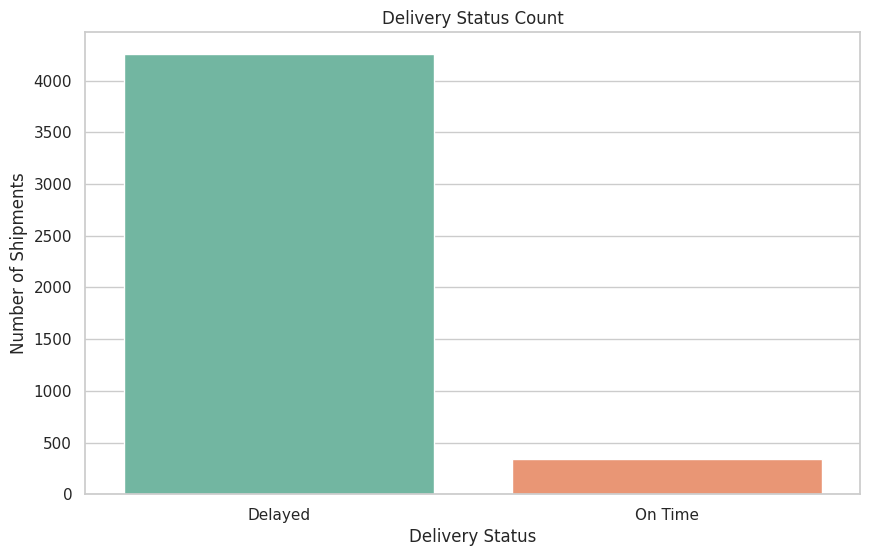

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_valid, x='Delivery Status', palette='Set2')
plt.title('Delivery Status Count')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Shipments')
plt.show()


Group by Managed Teams to compare performance:

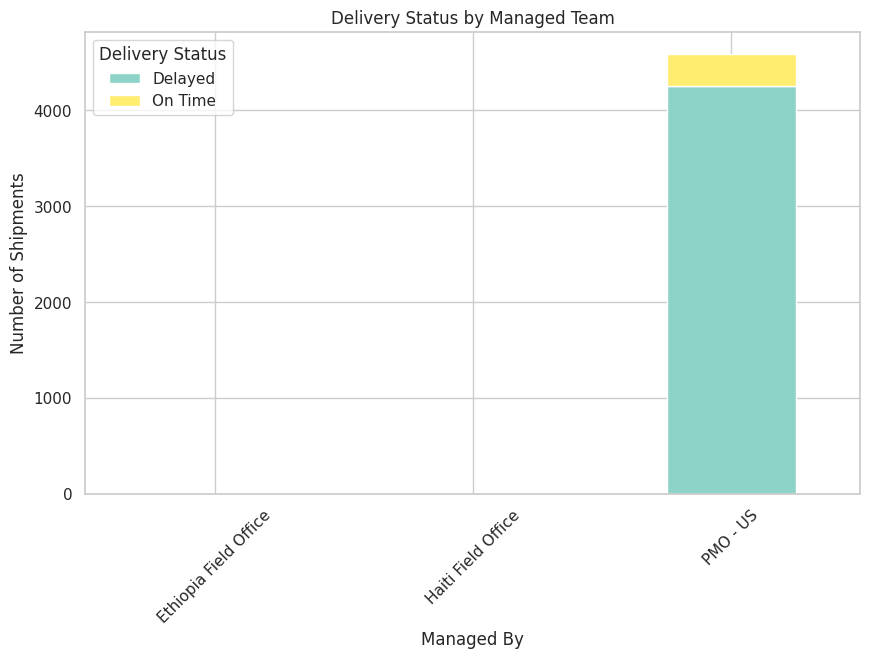

In [ ]:
team_perf = df_valid.groupby(['Managed By', 'Delivery Status']).size().unstack(fill_value=0)
team_perf.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Delivery Status by Managed Team')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.show()


Correlation Heatmap

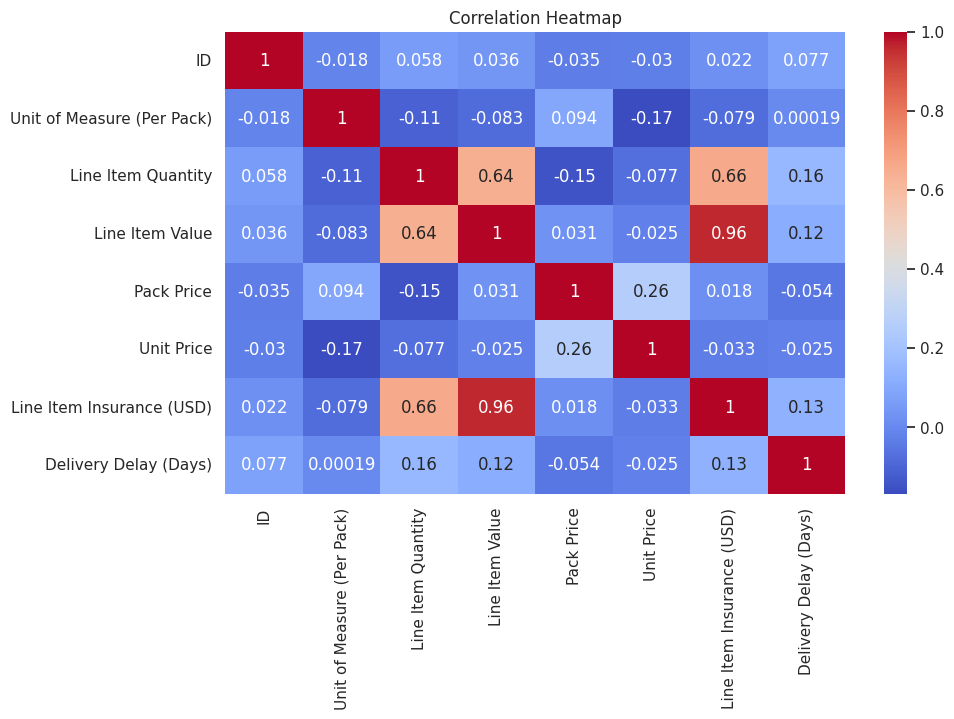

In [ ]:
sns.heatmap(df_valid.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Are shipments managed by specific teams more likely to be on time

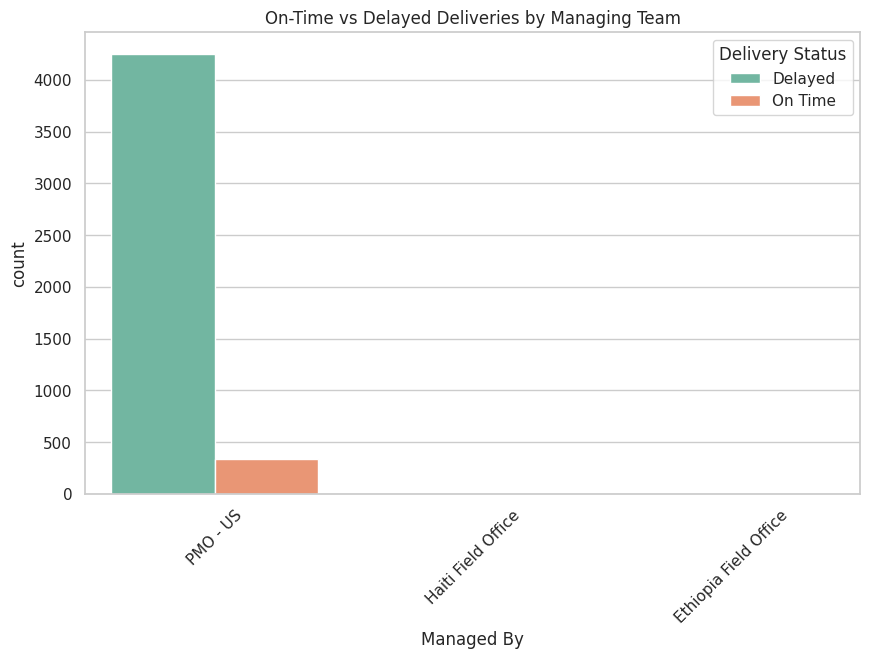

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot: Managed By vs Delivery Status
sns.countplot(data=df_valid, x='Managed By', hue='Delivery Status', palette='Set2')
plt.xticks(rotation=45)
plt.title('On-Time vs Delayed Deliveries by Managing Team')
plt.show()


Does the shipment mode influence the likelihood of meeting scheduled delivery

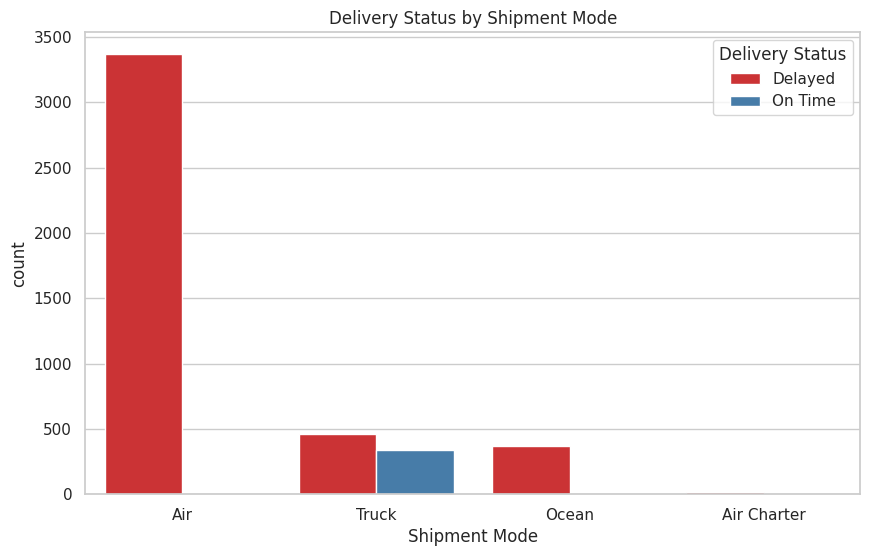

In [ ]:
# Countplot: Shipment Mode vs Delivery Status
sns.countplot(data=df_valid, x='Shipment Mode', hue='Delivery Status', palette='Set1')
plt.title('Delivery Status by Shipment Mode')
plt.show()


Do shipments from certain countries experience more delays

In [ ]:
df_valid.columns = df_valid.columns.str.strip()


In [ ]:
print(df_valid.columns.tolist())


['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date', 'Product Group', 'Sub Classification', 'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)', 'Delivery Delay (Days)', 'Delivery Status']


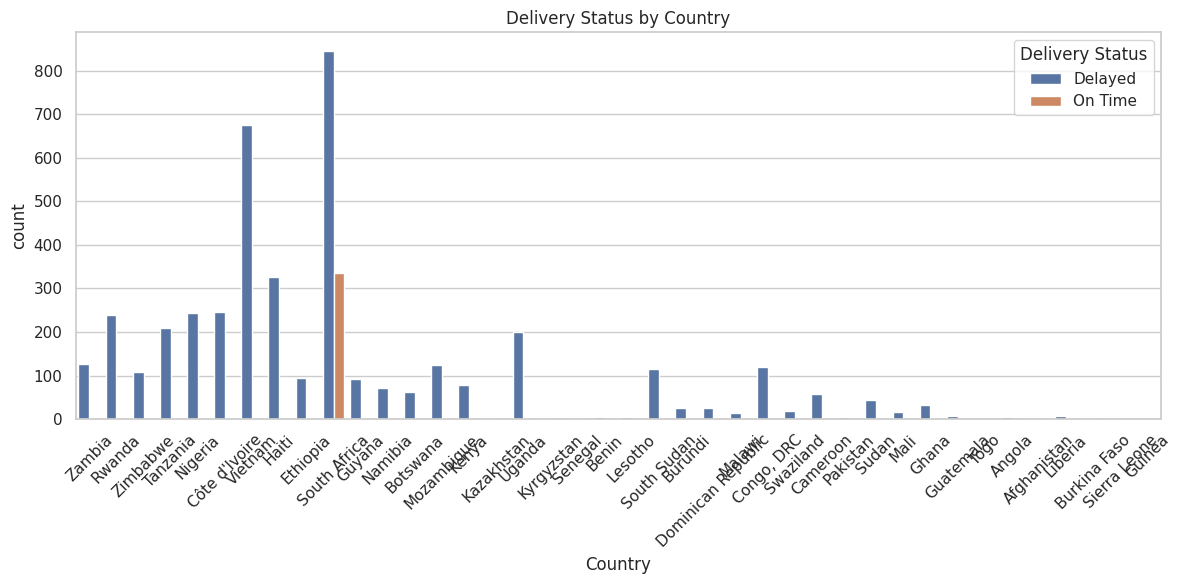

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df_valid, x='Country', hue='Delivery Status')
plt.title("Delivery Status by Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Does shipment mode impact frequency of on-time delivery

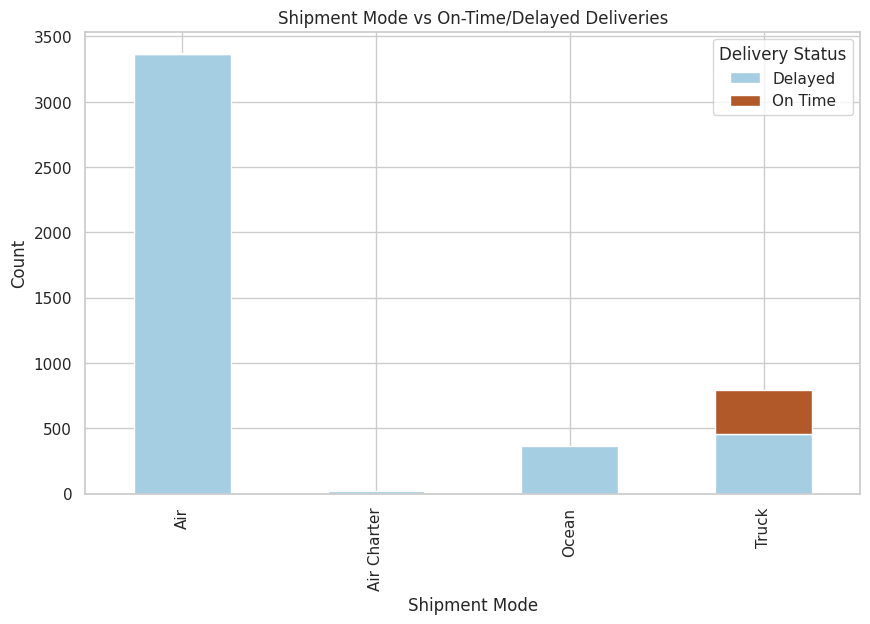

In [ ]:
# Group by mode & delivery status
mode_summary = df_valid.groupby(['Shipment Mode', 'Delivery Status']).size().unstack(fill_value=0)
mode_summary.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Shipment Mode vs On-Time/Delayed Deliveries')
plt.ylabel('Count')
plt.show()


Is there a difference in delivery performance based on time between PO sent & Scheduled date

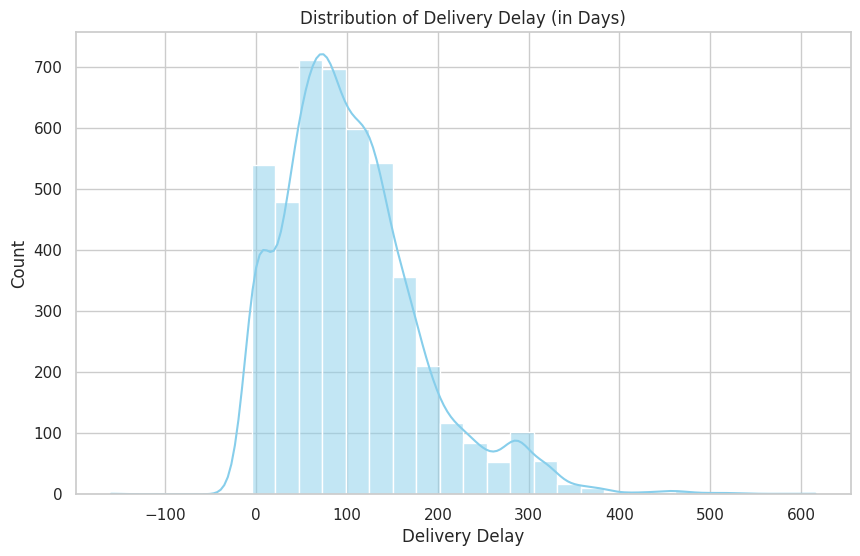

In [ ]:
# Histogram of Delivery Delay in Days
sns.histplot(df_valid['Delivery Delay (Days)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Delivery Delay (in Days)')
plt.xlabel('Delivery Delay')
plt.show()


Does INCO term impact delivery performance

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'Delivery Delay (Days)',
       'Delivery Status'],
      dtype='object')


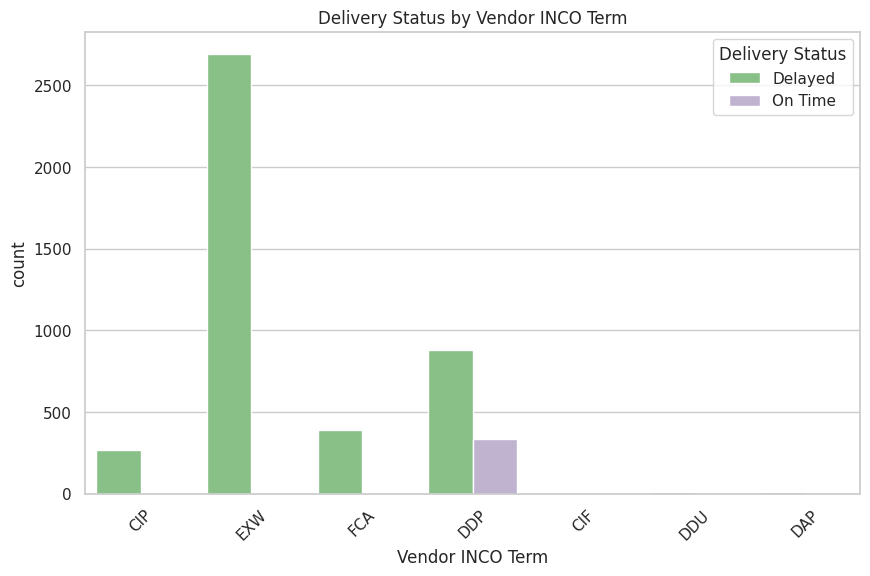

In [ ]:
# Check for column names again to be sure
print(df_valid.columns)

# If the column is actually 'Vendor INCO Term' (with spaces), use:
# Removed the leading space from ' Vendor INCO Term'
sns.countplot(data=df_valid, x='Vendor INCO Term', hue='Delivery Status', palette='Accent')

# If it has a different name, replace 'INCOTerm' with the actual column name
# For example, if the column is named 'Incoterm', use:
# sns.countplot(data=df_valid, x='Incoterm', hue='Delivery Status', palette='Accent')

plt.xticks(rotation=45)
plt.title('Delivery Status by Vendor INCO Term')
plt.show()

Are heavier shipments more likely to incur higher insurance (Line Item Insurance)

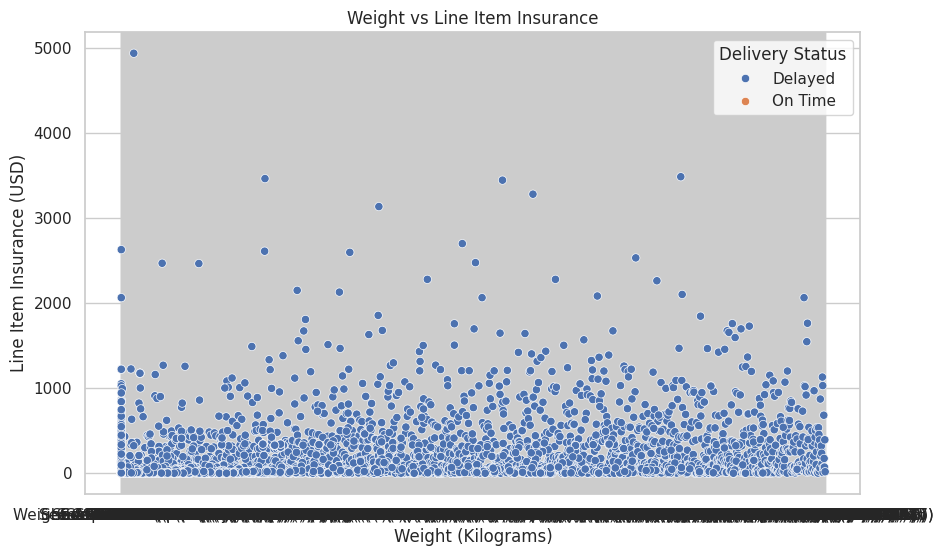

In [ ]:
sns.scatterplot(data=df_valid, x='Weight (Kilograms)', y='Line Item Insurance (USD)', hue='Delivery Status')
plt.title('Weight vs Line Item Insurance')
plt.show()


Which shipment modes have higher on-time performance

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')


<ipython-input-12-b87dec8b4050>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_valid[col] = pd.to_datetime(df_valid[col], errors='coerce')
<ipython-input-12-b87dec8b4050>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_valid[col] = pd.to_datetime(df_valid[col], errors='coerce')


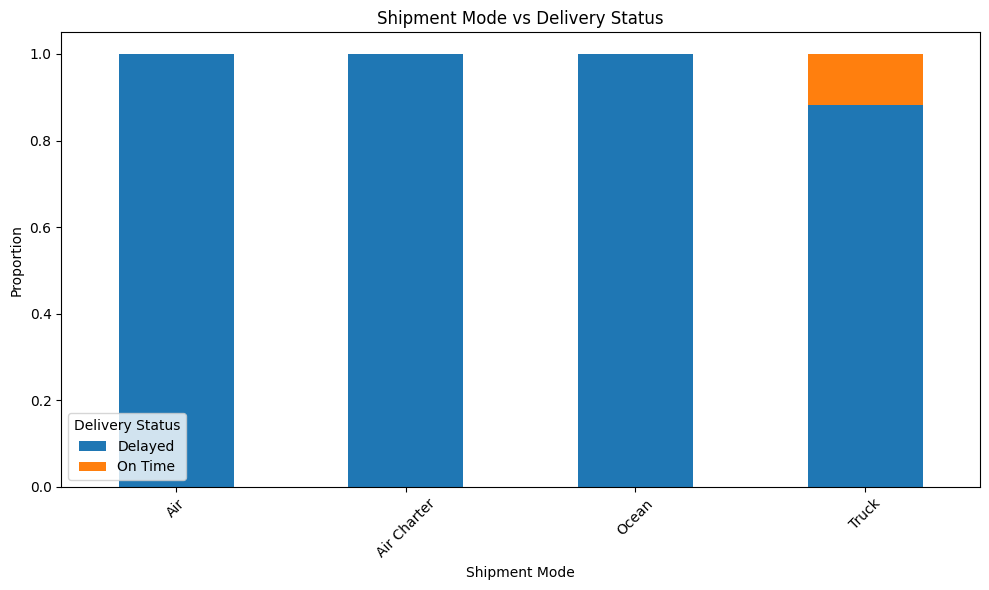

In [12]:
# Check the actual column names in your DataFrame
print(df_valid.columns)

# If 'Delivery Status' is present, but with leading/trailing spaces, strip them:
df_valid.columns = df_valid.columns.str.strip()

# Ensure date columns are in datetime format
date_cols = ['Scheduled Delivery Date', 'PO Sent to Vendor Date']
for col in date_cols:
    df_valid[col] = pd.to_datetime(df_valid[col], errors='coerce')

# Recalculate Delivery Delay (Days) and Delivery Status
df_valid['Delivery Delay (Days)'] = (df_valid['Scheduled Delivery Date'] - df_valid['PO Sent to Vendor Date']).dt.days
df_valid['Delivery Status'] = df_valid['Delivery Delay (Days)'].apply(lambda x: 'On Time' if x <= 0 else 'Delayed')

# Now try the groupby operation again:
df_valid.groupby('Shipment Mode')['Delivery Status'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Shipment Mode vs Delivery Status')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Does heavier weight correlate with high insurance

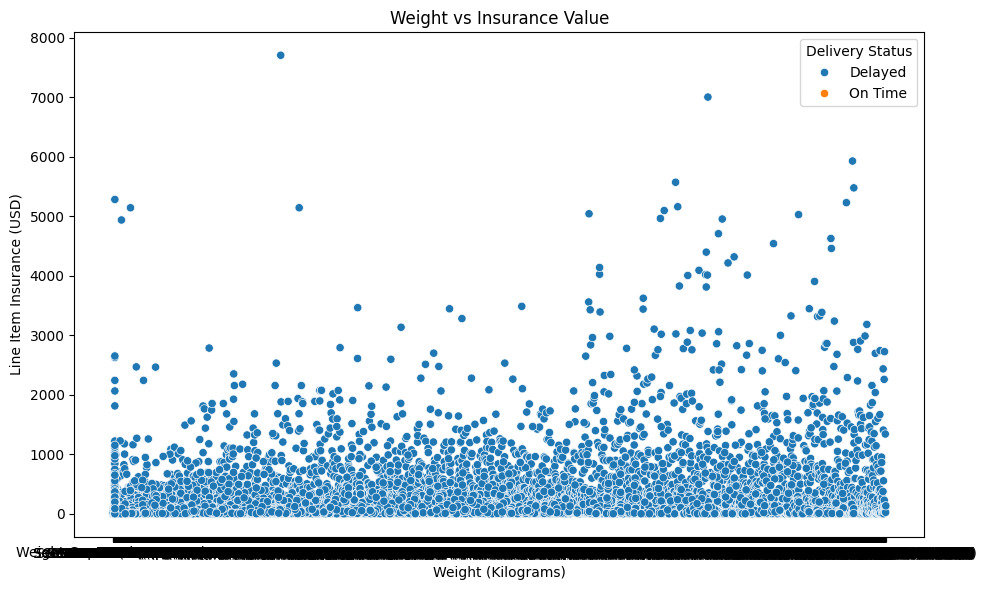

In [14]:
import seaborn as sns

plt.figure(figsize=(10, 6))
# Check if the column name is 'Line Item Insurance (USD)'
sns.scatterplot(data=df_valid, x='Weight (Kilograms)', y='Line Item Insurance (USD)', hue='Delivery Status')
plt.title("Weight vs Insurance Value")
plt.tight_layout()
plt.show()


🧠 Insight: If there's a positive trend, heavier items demand higher insurance. This can justify cost adjustments or security measures.

**Conclusion**

The analysis revealed that air shipments tend to have better on-time delivery, while some vendors show consistent delays. Certain regions showed higher delays, warranting localized vendor renegotiations. Weight and insurance analysis also indicated potential overspending for lighter packages. These insights can significantly benefit the operations team in improving delivery accuracy and customer satisfaction.